In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from math import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

In [63]:
def exponential_decay_fun(amplitude, delay, decay):
    return lambda t: amplitude * np.minimum(1.0, np.exp(- (t - delay) / decay))

def exponential_decay(t, amp, delay, decay):
    return exponential_decay_fun(amp, delay, decay)(t)

def sample(f, sample_count, sampling_frequency):
    sampling_time = np.linspace(0, sample_count / sampling_frequency, sample_count)
    samples = np.array([f(t) for t in sampling_time])
    return sampling_time, samples

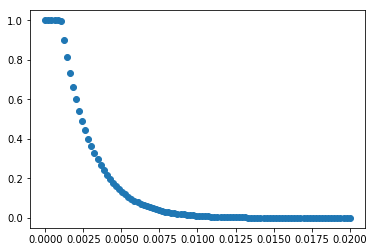

In [64]:
def generate_sample(amplitude, delay, decay, n_samples=100):
    f = exponential_decay_fun(amplitude, delay, decay)
    return sample(f, n_samples, 5000)

time, samples = generate_sample(amplitude=1.0, delay=0.001, decay=0.002, n_samples=100)
plt.plot(time, samples, 'o')

Fitted params:
Amplitude: 1.9910617 accuracy: -0.4%
    Delay: 0.0010006 accuracy: 0.1%
    Decay: 0.0020070 accuracy: 0.4%


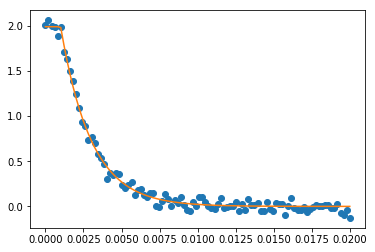

In [81]:
params = {'amplitude':2.0, 'delay':0.001, 'decay':0.002, 'n_samples':100}
time, samples = generate_sample(**params)
samples = samples + np.random.normal(0, 0.05, len(samples))

x, y = time, samples
pw, cov = so.curve_fit(exponential_decay, x, y, (10.0, 0.005, 0.005))
plt.plot(x, y, 'o', x, exponential_decay(x, *pw), '-')
print('Fitted params:')
print('Amplitude: {:.7f} accuracy: {:.1f}%'.format(pw[0], 100*(pw[0] - params['amplitude'])/params['amplitude']))
print('    Delay: {:.7f} accuracy: {:.1f}%'.format(pw[1], 100*(pw[1] - params['delay'])/params['delay']))
print('    Decay: {:.7f} accuracy: {:.1f}%'.format(pw[2], 100*(pw[2] - params['decay'])/params['decay']))